<a href="https://colab.research.google.com/github/JDiogoRiveroFreitas/AlgoritmosOptmizacion-03MIAR/blob/main/DiogoRivero_AG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 1
## Algoritmos de Optimización, Máster en Inteligencia Artificial, VIU

> **José Diogo Rivero Freitas**

Notebook en Google Colab: https://colab.research.google.com/drive/1vrFB0t1vz-hewuMBkv91yn14r4HEs6nv?usp=sharing

GitHub personal: https://github.com/JDiogoRiveroFreitas

Carpeta de la asignatura en GitHub: https://github.com/JDiogoRiveroFreitas/AlgoritmosOptmizacion-03MIAR.git


### **Torres de Hanoi - Divide y venceras**

In [1]:
def Torres_Hanoi(N, desde, hasta):
  '''
  N - Nº de fichas
  desde - torre inicial
  hasta - torre final
  '''

  if N==1 :
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))

  else:
    Torres_Hanoi(N-1, desde, 6-desde-hasta)
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))
    Torres_Hanoi(N-1, 6-desde-hasta,  hasta)

Torres_Hanoi(4, 1, 3)

Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 3 hasta 1
Lleva la ficha desde 3 hasta 2
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 2 hasta 1
Lleva la ficha desde 3 hasta 1
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 3


### Cambio de monedas - Técnica voraz

In [2]:
#Cambio de monedas - Técnica voraz

SISTEMA = [50, 20, 10, 5, 2, 1] #Valor de las monedas del sistema (€)

def cambio_monedas(CANTIDAD,SISTEMA):
  '''
  CANTIDAD: valor a devolver
  SISTEMA: valor de las monedas disponibles
  '''
  SOLUCION = [0] * len(SISTEMA)
  ValorAcumulado = 0

  for i, valor in enumerate(SISTEMA):
    monedas = (CANTIDAD-ValorAcumulado) // valor
    SOLUCION[i] = monedas
    ValorAcumulado = ValorAcumulado + monedas*valor

    if CANTIDAD == ValorAcumulado:
      return SOLUCION

  print("No es posible encontrar solucion")

cambio_monedas(78, SISTEMA)

[1, 1, 0, 1, 1, 1]

### **N Reinas - Vuelta Atrás**

In [3]:
def es_prometedora(SOLUCION, etapa):
  '''
  Verifica que en la solución parcial no hay amenzas entre reinas
  '''
  #Si la solución tiene dos valores iguales no es valida => Dos reinas en la misma fila
  for i in range(etapa+1):
    if SOLUCION.count(SOLUCION[i]) > 1:
      return False

    #Verifica las diagonales
    for j in range(i+1, etapa +1):
      if abs(i-j) == abs(SOLUCION[i]-SOLUCION[j]) : return False
  return True

def reinas(N, solucion=[], etapa=0):
  '''
  Proceso principal de N-reinas
  '''
  if len(solucion) == 0:         # [0,0,0...]
    solucion = [0 for i in range(N) ]

  for i in range(1, N+1):
    solucion[etapa] = i
    if es_prometedora(solucion, etapa):
      if etapa == N-1:
        print(solucion)
      else:
        reinas(N, solucion, etapa+1)
    else:
      None

  solucion[etapa] = 0

reinas(8, solucion=[], etapa=0)

[1, 5, 8, 6, 3, 7, 2, 4]
[1, 6, 8, 3, 7, 4, 2, 5]
[1, 7, 4, 6, 8, 2, 5, 3]
[1, 7, 5, 8, 2, 4, 6, 3]
[2, 4, 6, 8, 3, 1, 7, 5]
[2, 5, 7, 1, 3, 8, 6, 4]
[2, 5, 7, 4, 1, 8, 6, 3]
[2, 6, 1, 7, 4, 8, 3, 5]
[2, 6, 8, 3, 1, 4, 7, 5]
[2, 7, 3, 6, 8, 5, 1, 4]
[2, 7, 5, 8, 1, 4, 6, 3]
[2, 8, 6, 1, 3, 5, 7, 4]
[3, 1, 7, 5, 8, 2, 4, 6]
[3, 5, 2, 8, 1, 7, 4, 6]
[3, 5, 2, 8, 6, 4, 7, 1]
[3, 5, 7, 1, 4, 2, 8, 6]
[3, 5, 8, 4, 1, 7, 2, 6]
[3, 6, 2, 5, 8, 1, 7, 4]
[3, 6, 2, 7, 1, 4, 8, 5]
[3, 6, 2, 7, 5, 1, 8, 4]
[3, 6, 4, 1, 8, 5, 7, 2]
[3, 6, 4, 2, 8, 5, 7, 1]
[3, 6, 8, 1, 4, 7, 5, 2]
[3, 6, 8, 1, 5, 7, 2, 4]
[3, 6, 8, 2, 4, 1, 7, 5]
[3, 7, 2, 8, 5, 1, 4, 6]
[3, 7, 2, 8, 6, 4, 1, 5]
[3, 8, 4, 7, 1, 6, 2, 5]
[4, 1, 5, 8, 2, 7, 3, 6]
[4, 1, 5, 8, 6, 3, 7, 2]
[4, 2, 5, 8, 6, 1, 3, 7]
[4, 2, 7, 3, 6, 8, 1, 5]
[4, 2, 7, 3, 6, 8, 5, 1]
[4, 2, 7, 5, 1, 8, 6, 3]
[4, 2, 8, 5, 7, 1, 3, 6]
[4, 2, 8, 6, 1, 3, 5, 7]
[4, 6, 1, 5, 2, 8, 3, 7]
[4, 6, 8, 2, 7, 1, 3, 5]
[4, 6, 8, 3, 1, 7, 5, 2]
[4, 7, 1, 8, 5, 2, 6, 3]


In [4]:
def escribe_solucion(S):
  '''
  Traduce la solución al tablero
  '''
  n = len(S)
  for x in range(n):
    print("")
    for i in range(n):
      if S[i] == x+1:
        print(" X " , end="")
      else:
        print(" - ", end="")


escribe_solucion([1, 5, 8, 6, 3, 7, 2, 4])


 X  -  -  -  -  -  -  - 
 -  -  -  -  -  -  X  - 
 -  -  -  -  X  -  -  - 
 -  -  -  -  -  -  -  X 
 -  X  -  -  -  -  -  - 
 -  -  -  X  -  -  -  - 
 -  -  -  -  -  X  -  - 
 -  -  X  -  -  -  -  - 

### **Viaje por el rio - Programación dinámica**

In [5]:
TARIFAS = [
[0, 5, 4, 3, 999, 999, 999],
[999, 0, 999, 2, 3, 999, 11],
[999, 999, 0, 1, 999, 4, 10],
[999, 999, 999, 0, 5, 6, 9],
[999, 999, 999, 999, 0, 999, 4],
[999, 999, 999, 999, 999, 0, 3],
[999, 999, 999, 999, 999, 999, 0]
]

#999 se puede sustituir por float("inf")


#Calculo de la matriz de PRECIOS y RUTAS
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]
  RUTA = [ [""]*N for i in [""]*N]

  for i in range(0,N-1):
    RUTA[i][i] = i             #Para ir de i a i se "pasa por i"
    PRECIOS[i][i] = 0          #Para ir de i a i se se paga 0
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k          #Anota que para ir de i a j hay que pasar por k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA
################################################################

PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

#Determinar la ruta con Recursividad
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return ""
  else:
    return str(calcular_ruta( RUTA, desde, RUTA[desde][hasta])) +  \
                ',' + \
                str(RUTA[desde][hasta] \
              )

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)

PRECIOS
[0, 5, 4, 3, 8, 8, 11]
[9999, 0, 999, 2, 3, 8, 7]
[9999, 9999, 0, 1, 6, 4, 7]
[9999, 9999, 9999, 0, 5, 6, 9]
[9999, 9999, 9999, 9999, 0, 999, 4]
[9999, 9999, 9999, 9999, 9999, 0, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
[0, 0, 0, 0, 1, 2, 5]
['', 1, 1, 1, 1, 3, 4]
['', '', 2, 2, 3, 2, 5]
['', '', '', 3, 3, 3, 3]
['', '', '', '', 4, 4, 4]
['', '', '', '', '', 5, 5]
['', '', '', '', '', '', '']

La ruta es:


',0,2,5'

### **Extra**

In [6]:
import numpy as np

In [7]:
points_1D = np.random.randint(0, 10001, 100)
# print(points_1D)

def points_cercanos_1D_fuerza_bruta(points):

    result = [points[0], points[1], int(points[0] - points[1])]
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            distance = abs(points[i] - points[j])

            if distance == 0:
                # En caso de dos valores iguales, rompe bucle y devuelve el primer par
                result[0] = points[i]
                result[1] = points[j]
                result[2] = distance
                return print(f'Existen 2 puntos coincidentes en {result[0]}.')

            elif distance < abs(result[0] - result[1]):
                result[0] = points[i]
                result[1] = points[j]
                result[2] = distance

    return print(f'Los puntos en {result[0]} y {result[1]}, son los más cercanos entre sí con una distancia de {result[2]} unidades lineales.')

points_cercanos_1D_fuerza_bruta(points_1D)

Existen 2 puntos coincidentes en 4086.


[array([1619,  263]), array([4274, 7750]), 7943.814826643431]


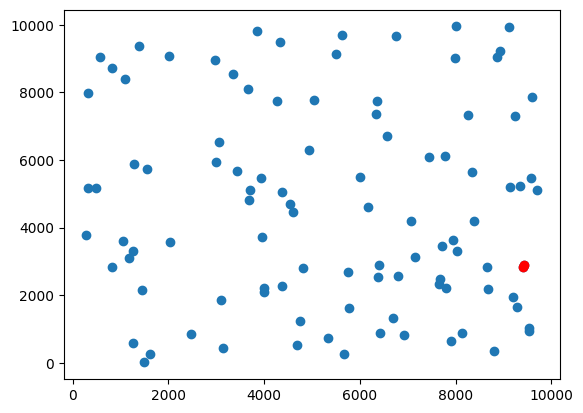


    Los puntos en (9439, 2890) y (9410, 2847), son los más cercanos entre sí con una distancia de 51.865 unidades lineales.
    


In [8]:
import matplotlib.pyplot as plt

points_2D = np.random.randint(0, 10001, size=(100, 2))
#print(points_2D)

def distance_2D(point_1, point_2):
    x1, y1 = point_1
    x2, y2 = point_2

    return (((x1 - x2)**2) + (y1 - y2)**2)**0.5


def points_cercanos_2D_fuerza_bruta(points):

    result = [points[0], points[1], distance_2D(points[0] , points[1])]
    print(result)
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            distance = distance_2D(points[i], points[j])

            if distance == 0:
                # En caso de dos valores iguales, rompe bucle y devuelve el primer par
                result[0] = points[i]
                result[1] = points[j]
                result[2] = distance
                return print(f'Existen 2 puntos coincidentes en {result[0]}. Han sido necesarias {count} operaciones.')

            elif distance < distance_2D(result[0], result[1]):
                result[0] = points[i]
                result[1] = points[j]
                result[2] = distance

    x, y = zip(*points_2D)

    plt.scatter(x, y)
    plt.scatter(result[0][0], result[0][1], color = 'red')
    plt.scatter(result[1][0], result[1][1], color = 'red')
    plt.show()

    return print(f'''
    Los puntos en ({result[0][0]}, {result[0][1]}) y ({result[1][0]}, {result[1][1]}), son los más cercanos entre sí con una distancia de {round(result[2], 3)} unidades lineales.
    ''')

points_cercanos_2D_fuerza_bruta(points_2D)



In [9]:
points_3D = np.random.randint(0, 10001, size=(100, 3))
#print(points_3D)

def distance_3D(point_1, point_2):
    x1, y1, z1 = point_1
    x2, y2, z2 = point_2

    return (((x1 - x2)**2) + (y1 - y2)**2 + (z1 - z2)**2)**0.5


def points_cercanos_3D_fuerza_bruta(points):

    result = [points[0], points[1], distance_3D(points[0] , points[1])]
    print(result)
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            distance = distance_3D(points[i], points[j])
            if distance == 0:
                # En caso de dos valores iguales, rompe bucle y devuelve el primer par
                result[0] = points[i]
                result[1] = points[j]
                result[2] = distance
                return print(f'Existen 2 puntos coincidentes en {result[0]}. Han sido necesarias {count} operaciones.')

            elif distance < distance_3D(result[0], result[1]):
                result[0] = points[i]
                result[1] = points[j]
                result[2] = distance

    return print(f'''
    Los puntos en ({result[0][0]}, {result[0][1]}, {result[0][2]}) y ({result[1][0]}, {result[1][1]}, {result[1][2]}), son los más cercanos entre sí con una distancia de {round(result[2], 3)} unidades lineales.
    ''')

points_cercanos_3D_fuerza_bruta(points_3D)

[array([1004, 8835, 5831]), array([1135, 8567, 5171]), 724.282403486375]

    Los puntos en (6952, 6517, 5666) y (6973, 6253, 5911), son los más cercanos entre sí con una distancia de 360.78 unidades lineales.
    
